# Logistic Regression pada Dataset Parkinson Disease



## Inisialisasi Library yang akan digunakan untuk mengolah dataset, training, dan validasi

In [1]:
#inisialisasi library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from yellowbrick.classifier import ClassificationReport


## Buka dataset dengan Dataframe Pandas, dan cek seluruh atribut yang ada

In [2]:
#siapkan dataframe untuk mengambil attribut
df = pd.read_csv("\\Users\\aftermath\\Documents\\Machine Learning\\logisticregression\\pd-speech-features.csv",header=None, skipinitialspace=True)

In [3]:
#masukan attribut kedalam array 
attrs = []
for attr in range(754):
    attrs.append(df.at[1,attr])

attrs.append('target')
attrs

['id',
 'gender',
 'PPE',
 'DFA',
 'RPDE',
 'numPulses',
 'numPeriodsPulses',
 'meanPeriodPulses',
 'stdDevPeriodPulses',
 'locPctJitter',
 'locAbsJitter',
 'rapJitter',
 'ppq5Jitter',
 'ddpJitter',
 'locShimmer',
 'locDbShimmer',
 'apq3Shimmer',
 'apq5Shimmer',
 'apq11Shimmer',
 'ddaShimmer',
 'meanAutoCorrHarmonicity',
 'meanNoiseToHarmHarmonicity',
 'meanHarmToNoiseHarmonicity',
 'minIntensity',
 'maxIntensity',
 'meanIntensity',
 'f1',
 'f2',
 'f3',
 'f4',
 'b1',
 'b2',
 'b3',
 'b4',
 'GQ_prc5_95',
 'GQ_std_cycle_open',
 'GQ_std_cycle_closed',
 'GNE_mean',
 'GNE_std',
 'GNE_SNR_TKEO',
 'GNE_SNR_SEO',
 'GNE_NSR_TKEO',
 'GNE_NSR_SEO',
 'VFER_mean',
 'VFER_std',
 'VFER_entropy',
 'VFER_SNR_TKEO',
 'VFER_SNR_SEO',
 'VFER_NSR_TKEO',
 'VFER_NSR_SEO',
 'IMF_SNR_SEO',
 'IMF_SNR_TKEO',
 'IMF_SNR_entropy',
 'IMF_NSR_SEO',
 'IMF_NSR_TKEO',
 'IMF_NSR_entropy',
 'mean_Log_energy',
 'mean_MFCC_0th_coef',
 'mean_MFCC_1st_coef',
 'mean_MFCC_2nd_coef',
 'mean_MFCC_3rd_coef',
 'mean_MFCC_4th_coef',



## Buat Dataframe baru dengan mengganti kolom utama dengan attribut yang didapat dari proses sebelumnya

In [4]:
#dataframe baru dengan nama kolom = attrs
dfnew = pd.read_csv("\\Users\\aftermath\\Documents\\Machine Learning\\logisticregression\\pd-speech-features.csv",header=None)
dfnew = df.iloc[2:]
dfnew.drop(dfnew.index[[0,2]])
dfnew.columns = attrs
dfnew.index =  range(len(dfnew.index))
print(dfnew.info())
print(dfnew.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Columns: 755 entries, id to target
dtypes: object(755)
memory usage: 4.4+ MB
None
         id gender      PPE      DFA     RPDE numPulses numPeriodsPulses  \
count   756    756      756      756      756       756              756   
unique  252      2      740      745      748       315              319   
top     180      1  0.82273  0.80358  0.34552       237              236   
freq      3    390        3        2        2         9                8   

       meanPeriodPulses stdDevPeriodPulses locPctJitter  ...  \
count               756                756          756  ...   
unique              755                646          358  ...   
top         0.006004477           7.17E-05      0.00076  ...   
freq                  2                  3            9  ...   

       tqwt_kurtosisValue_dec_28 tqwt_kurtosisValue_dec_29  \
count                        756                       756   
unique              

In [5]:
#dataframe yang dibentuk
dfnew.head(20)

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,target
0,0,1,0.85247,0.71826,0.57227,240,239,0.00806353,8.68E-05,0.00218,...,1.562,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258256,7.31E-05,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.178,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.00833959,6.04E-05,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010857733,0.000182739,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.846,6.265,4.0603,1
4,1,0,0.3279,0.79782,0.53028,236,235,0.008161574,0.002668863,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1
5,1,0,0.5078,0.78744,0.65451,226,221,0.007631204,0.002696381,0.00783,...,4.8025,5.0734,7.0166,5.9966,5.2065,7.4246,3.4153,3.5046,3.225,1
6,2,1,0.76095,0.62145,0.54543,322,321,0.005990989,0.000107266,0.00222,...,117.2678,75.3156,32.0478,7.706,3.106,4.6206,12.8353,13.83,7.7693,1
7,2,1,0.83671,0.62079,0.51179,318,317,0.006073855,0.000135739,0.00282,...,3.8564,11.8909,7.2891,4.3682,3.6443,5.961,11.7552,18.0927,5.0448,1
8,2,1,0.80826,0.61766,0.50447,318,317,0.006057188,6.93E-05,0.00161,...,2.264,6.3993,4.4165,4.2662,3.6357,3.7346,2.9394,3.6216,3.843,1
9,3,0,0.85302,0.62247,0.54855,493,492,0.003910221,3.99E-05,0.00075,...,1.6796,2.0474,2.8117,3.507,3.2727,3.8415,3.9439,5.8807,38.7211,1



## Cek apakah terdapat data yang hilang (null)

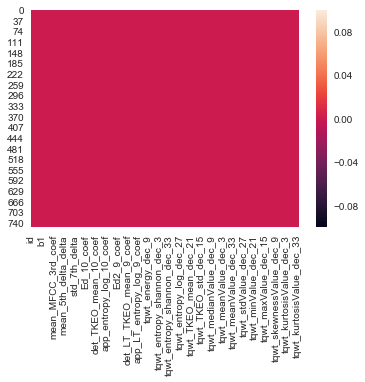

In [6]:
#cek apakah ada data yang hilang
missing_values = dfnew.isnull()
missing_values

sns.heatmap(data = missing_values)


## Lihat perbandingan jumlah kelas dengan Label 0 dan Label 1

1    564
0    192
Name: target, dtype: int64

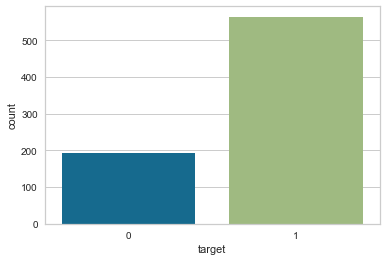

In [7]:
#melihat perbandingan jumlah kelas label 1 dan 0
sns.countplot(x='target', data=dfnew)
dfnew.target.value_counts()

## SMOTE untuk imbalance data

In [8]:
#prepare train-test data
feature = attrs
feature.pop(0)
feature.pop(753)
feature

features = dfnew[feature]
label = dfnew['target']

In [9]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=2)
features, label = sm.fit_sample(features, label.ravel())
print("After OverSampling, counts of label '1': {}".format(sum(label=='1')))
print("After OverSampling, counts of label '0': {}".format(sum(label=='0')))

After OverSampling, counts of label '1': 564
After OverSampling, counts of label '0': 564



## Siapkan data training dan testing dan normalisasikan data tersebut

In [10]:
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.25, random_state=101)

In [11]:
#normalisation
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


## Bentuk model Logistic Regression, kemudian lihat skor hasil model antara fit dan 5-fold cross validation

In [12]:
#train the model and look at test score
logmodel = LogisticRegression()

score =  cross_val_score(logmodel, features, label, cv=5)
print("CROSS VALIDATION SCORE : ",statistics.mean(score))
logmodel.fit(X_train, y_train)

print("SCORE : ",logmodel.score(X_test, y_test))



C:\Users\aftermath\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\aftermath\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


SCORE :  0.9042553191489362


C:\Users\aftermath\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\aftermath\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\aftermath\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\aftermath\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


CROSS VALIDATION SCORE :  0.6746286346396966



## Bentuk tabel dan heatmap hasil evaluasi model

               precision    recall  f1-score   support

not-parkinson       0.89      0.92      0.91       143
    parkinson       0.92      0.88      0.90       139

    micro avg       0.90      0.90      0.90       282
    macro avg       0.90      0.90      0.90       282
 weighted avg       0.90      0.90      0.90       282



C:\Users\aftermath\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


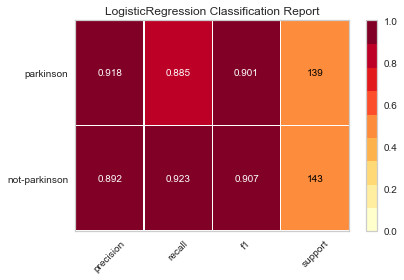

In [13]:
#evaluate the model
classes = ['not-parkinson','parkinson']
y_pred = logmodel.predict(X_test)
print(classification_report(y_test, y_pred, target_names=classes))

visualizer = ClassificationReport(logmodel, classes=classes, support=True)
visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()             # Draw/show/poof the data